# Ice Cream Selling


In [83]:
#Importar datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-bright')


df = pd.read_csv('..\data\Ice_cream selling data.csv')

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jluis\AppData\Local\Temp\ipykernel_2084\2847740705.py:10: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\Ice_cream selling data.csv')


In [62]:
#Informacion sobre el dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 916.0 bytes


In [63]:
#Primero registros del dataset
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [64]:
#Cantidad de filas y columnas
df.shape

(49, 2)

In [65]:
# Valores nulos
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [66]:
# Valores duplicados
df.loc[df.duplicated()]

,Temperature (°C),Ice Cream Sales (units)


In [67]:
# Análisis estadistico
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


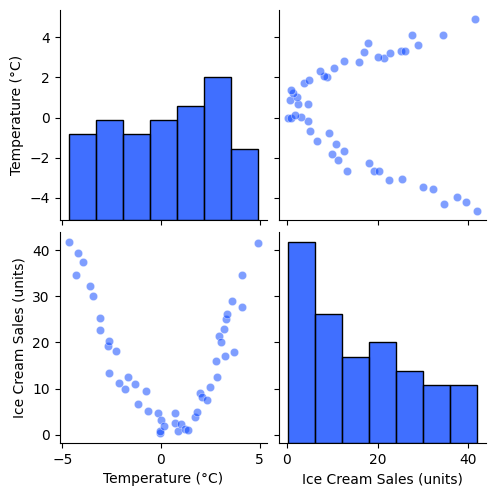

In [68]:
sns.pairplot(df, kind='scatter', plot_kws={'alpha':0.5})

In [69]:
df.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

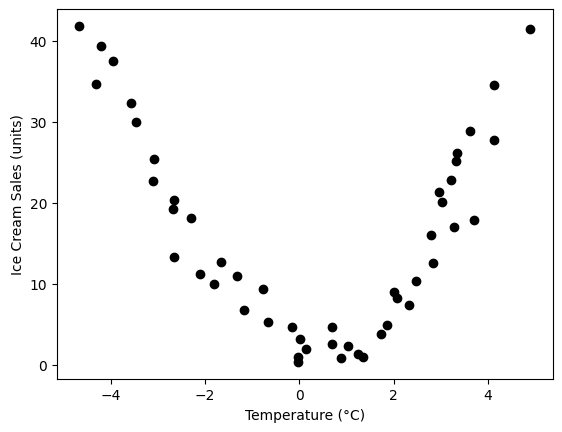

In [107]:
#Distribucion de los datos
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'], color='black')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.show()

In [104]:
#Implementación del modelo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Definicion de las variables
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

#Separar datos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Definir grado del polinomio
poly_reg = PolynomialFeatures(degree=2, include_bias=False)

#Transformar las caracteristicas actuales en caracteristicas de mayor grado
poly_x_train = poly_reg.fit_transform(x_train)
poly_x_test  = poly_reg.transform(x_test)

#Definir el modelo
model = LinearRegression()

#Entrenar el modelo
model.fit(poly_x_train, y_train)

x_plot = np.linspace(x_train.min(), x_train.max(), 200).reshape(-1, 1)
poly_x_plot = poly_reg.transform(x_plot)
y_plot = model.predict(poly_x_plot)

#Predecir resultados
y_pred = model.predict(poly_x_test)

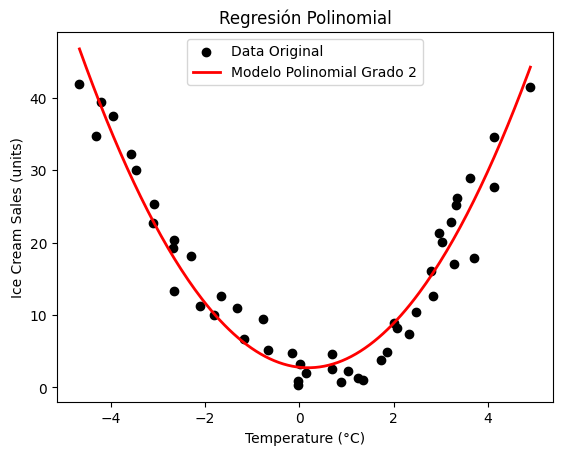

In [105]:
#Visualizar modelo
plt.scatter(x, y, color='black', label='Data Original')
plt.plot(x_plot, y_plot, linewidth=2, color='red', label='Modelo Polinomial Grado 2')

plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Regresión Polinomial')
plt.legend()
plt.show()


In [106]:
# Evaluar performance del modelo

# Error R^2
r2 = r2_score(y_test, y_pred)
# Error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
# Error cuadratico medio
mse = mean_squared_error(y_test, y_pred)

print(f'Error R^2: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')

Error R^2: 0.8430551371938839
MAE: 3.2299819836597288
MSE: 14.878796440981493
